# Titanic Data Visualization
This kernel will look at the Titanic Data to analyze the Survival rates based on different factors.  Tidyverse packages are used to process and visualize the data using the provided training set.

<hr>

## Load packages and Data
- **readr** will be used to read in the Data using the *read_csv* function
- **dplyr** will be used for most of the data processing and manipulation
- **ggplot2** will be used for data visualization

In [1]:
library(readr) # Reading in data
library(dplyr) # Data manipulation
library(tibble) # Data manipulation
library(ggplot2) # Data visualization
library(ggthemes) # Data visualization
library(RColorBrewer) # Data visualization


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
titanic <- read_csv("../Data/titanic_train.csv")
head(titanic)

Parsed with column specification:
cols(
  PassengerId = col_integer(),
  Survived = col_integer(),
  Pclass = col_integer(),
  Name = col_character(),
  Sex = col_character(),
  Age = col_double(),
  SibSp = col_integer(),
  Parch = col_integer(),
  Ticket = col_character(),
  Fare = col_double(),
  Cabin = col_character(),
  Embarked = col_character()
)


PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NA,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NA,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NA,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,NA,Q


Survived, Pclass, Sex, Age, SibSp and Parch variables will be used to visualize and analyze the data

<hr>

## Add a Varibale for Family Size
- Combine **SibSp** and **Parch** variables together and add 1 (for self) 
- Use the *mutate* function to add a new variable to the dataset

In [3]:
titanic <- titanic %>%
  mutate(FamilySize = 1 + SibSp + Parch) 

## Convert Certain Variable into Factors
- Convert **Pclass**, **Survived** and **Sex** Variables into Factors using the *mutate* function
- Keep **Age** and  **FamilySize** variables numeric

In [5]:
titanic <- titanic %>%
  mutate(Pclass = factor(Pclass), 
         Survived = factor(Survived), 
         Sex = factor(Sex)) 

**Age** has some missing values (NA).  Missing values will be ignored for now

<hr>

# 1. Look at the Total Survival Rate 
- Use *table* function to look at the Survival rates
- Convert table to a **tibble** to use later when plotting with ggplot2 to add text to the graph
- Use *rename* function to rename default Column names

In [9]:
survival <- table(titanic$Survived) %>%
  as_tibble() %>%
  rename(Survived = Var1, Count = n)

survival

Survived,Count
0,549
1,342


## Look at the Total Survival Rate proportion
- Use *prop.table* to get the proportion

In [10]:
survival_ratio <- prop.table(table(titanic$Survived)) %>%
  as_tibble() %>%
  rename(Survived = Var1, Percentage = n) %>%
  mutate(Percentage = round(Percentage, 2)*100)

survival_ratio

Survived,Percentage
0,62
1,38


## Plot the Total Survival Rate 
- Using a barplot with *theme_few* theme from the **ggthemes** package
- Add some styling to the plot: Center the Title and color, Edit the Legends 
- Use tibble of survival data in *geom_text* to add the Count to the plot
- Use tibble of survival data ratio in *geom_label* to add the Percentages to the bars

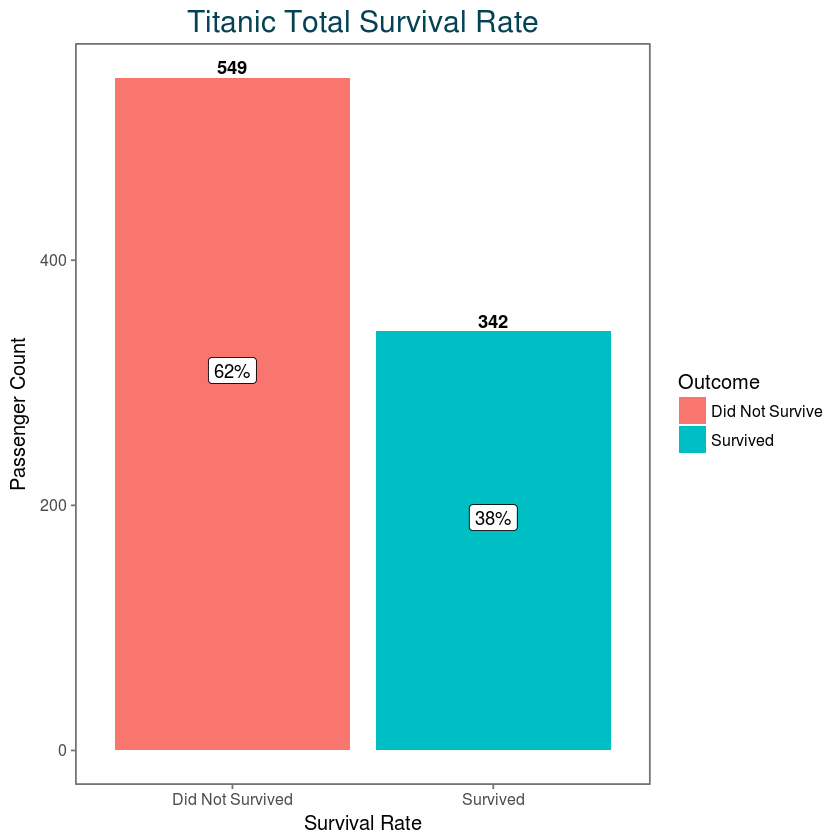

In [19]:
titanic %>%
  ggplot() +
  geom_bar(aes(x = Survived, fill = Survived)) +
  geom_text(data = survival, 
            aes(x = Survived, y = Count, label = Count), 
            position = position_dodge(width=0.9), 
            vjust=-0.25,
            fontface = "bold") +
  geom_label(data = survival_ratio, 
             aes(x = Survived, y = Percentage, label = paste0(Percentage, "%"), group = Survived), 
             position = position_stack(vjust = 5)) +
  theme_few() +
  theme(plot.title = element_text(hjust = 0.5, size=18, color = "#054354")) +
  ggtitle("Titanic Total Survival Rate") +
  scale_x_discrete(name= "Survival Rate", labels = c("Did Not Survived", "Survived")) +
  scale_y_continuous(name = "Passenger Count") +
  scale_fill_discrete(name = "Outcome", labels = c("Did Not Survive", "Survived"))

- Only 38% of people survived (342 out of total of 891)

<hr>

# 2. Look at Survival Rate by Gender
- Group the data by **Sex** using the *group_by* function 
- Get the total Count with *summarise* function

In [6]:
gender <- titanic %>%
  group_by(Sex) %>%
  summarise(Count = n())

gender

Sex,Count
female,314
male,577


## Look at the Gender Survival Rate proportion
- Use *mutate* to add a new Percentage variable

In [7]:
gender_ratio <- titanic %>%
  group_by(Sex, Survived) %>%
  summarise(Count = n()) %>%
  mutate(Percentage = round(Count/sum(Count)*100))

gender_ratio

Sex,Survived,Count,Percentage
female,0,81,26
female,1,233,74
male,0,468,81
male,1,109,19


## Plot the Gender Survival Rate
- Using a barplot
- Represent Gender on the x-axis
- Use Color to represent Survival on the Plot
- Add the Count and Percentage using *geom_text* and *geom_label* respectively

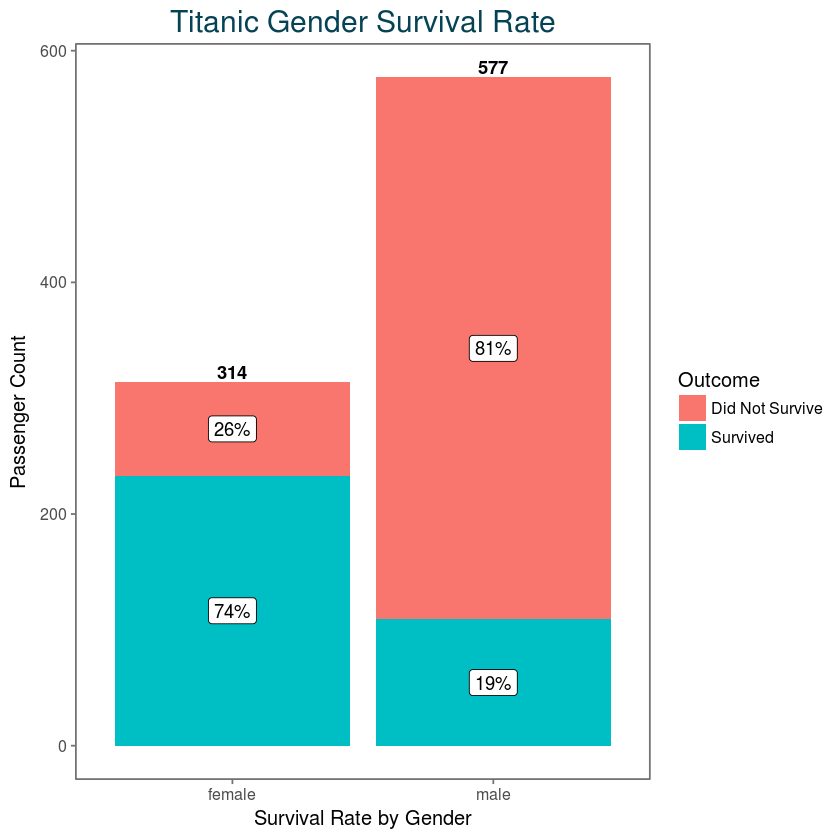

In [18]:
titanic %>%
  ggplot() +
  geom_bar(aes(x = Sex, fill = Survived)) +
  geom_text(data = gender, 
            aes(x = Sex, y = Count, label = Count), 
            position = position_dodge(width=0.9), 
            vjust=-0.25, 
            fontface = "bold") +
  geom_label(data = gender_ratio, 
             aes(x = Sex, y = Count, label = paste0(Percentage, "%"), group = Survived), 
             position = position_stack(vjust = 0.5)) +
  theme_few() +
  theme(plot.title = element_text(hjust = 0.5, size=18, colour = "#054354")) +
  ggtitle("Titanic Gender Survival Rate") +
  scale_x_discrete(name= "Survival Rate by Gender") +
  scale_y_continuous(name = "Passenger Count") +
  scale_fill_discrete(name = "Outcome", labels = c("Did Not Survive", "Survived"))  

- Out of total of 314 Females, 74% Survived and 26% Did Not Survive
- Out of total 577 Males, only 19% Survived and 81% Did Not Survive

<hr>

# 3. Look at Survival Rate by Ticket Class
- Group the data by **Pclass** using the *group_by* function
- Get the total Count with *summarise* function 

In [20]:
pclass <- titanic %>%
  group_by(Pclass) %>%
  summarise(Count = n())

pclass

Pclass,Count
1,216
2,184
3,491


In [21]:
pclass_ratio <- titanic %>%
  group_by(Pclass, Survived) %>%
  summarise(Count = n()) %>%
  mutate(Percentage = round(Count/sum(Count)*100))

pclass_ratio

Pclass,Survived,Count,Percentage
1,0,80,37
1,1,136,63
2,0,97,53
2,1,87,47
3,0,372,76
3,1,119,24


## Plot the Gender Survival Rate
- Using a barplot using black and white theme *theme_bw* from **ggplot2**
- Represent Pclass on the x-axis
- Use Color to represent Survival on the Plot
- Add the Count and Percentage using geom_text and geom_label respectively

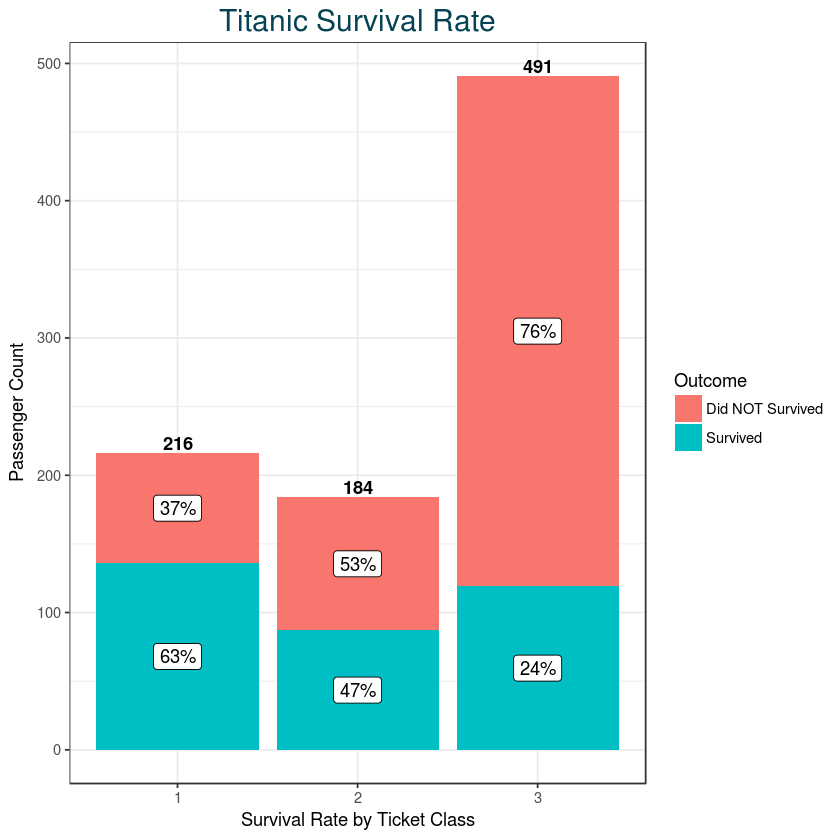

In [22]:
titanic %>%
  ggplot() +
  geom_bar(aes(x = Pclass, fill = Survived)) +
  geom_text(data = pclass, aes(x = Pclass, y = Count, label = Count), position = position_dodge(width=0.9), vjust=-0.25, fontface = "bold") +
  geom_label(data = pclass_ratio, aes(x = Pclass, y = Count, label = paste0(Percentage, "%"), group = Survived), position = position_stack(vjust = 0.5)) +
  theme_bw() +
  theme(plot.title = element_text(hjust = 0.5, size=18, colour = "#054354")) +
  ggtitle("Titanic Survival Rate") +
  scale_x_discrete(name= "Survival Rate by Ticket Class") +
  scale_y_continuous(name = "Passenger Count") +
  scale_fill_discrete(name = "Outcome", labels = c("Did Not Survive", "Survived"))  

- 1st Class: 216
  - 63% Survived
  - 37%  Did NOT Survive
- 2nd Class: 184
  - 47% Survived
  - 53%  Did NOT Survive
- 3rd Class: 491
  - 24% Survived
  - 76%  Did NOT Survive

<hr>

## Look at Gender Survival Rate by Ticket Class
- Use facetting to look at Gender Survival by Pclass
- Use Color to represent Survival on the Plot

### Looking at Gender Proportion in each Class
- 1st Class:
  - Females: 44%
  - Males: 56%
- 2nd Class:
  - Females: 41%
  - Males: 59%
- 3rd Class:
  - Females: 29%
  - Males: 71%
- Higher ratio of Male to Female in 3rd Class compared to 1st and 2nd Class

In [23]:
pclass_gender <- titanic %>%
  group_by(Pclass) %>%
  summarise(Count = n())

pclass_gender

Pclass,Count
1,216
2,184
3,491


In [24]:
pclass_gender_ratio <- titanic %>%
  group_by(Pclass, Sex) %>%
  summarise(Count = n()) %>%
  mutate(Percentage = round(Count/sum(Count)*100))

pclass_gender_ratio

Pclass,Sex,Count,Percentage
1,female,94,44
1,male,122,56
2,female,76,41
2,male,108,59
3,female,144,29
3,male,347,71


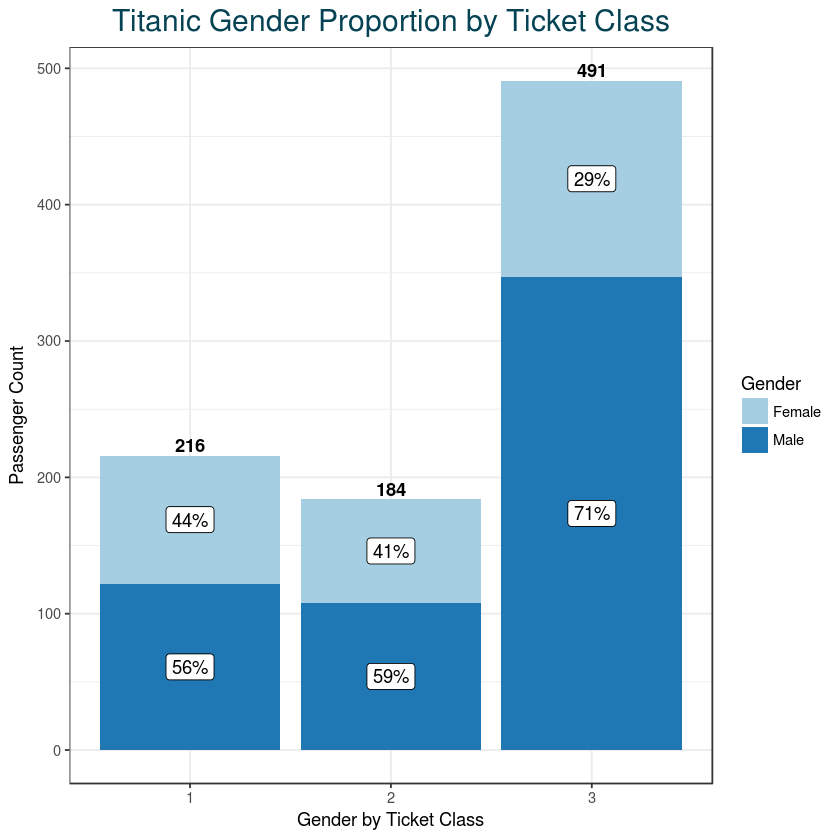

In [25]:
titanic %>%
  ggplot() +
  geom_bar(aes(x = Pclass, fill = Sex)) +
  geom_text(data = pclass_gender, aes(x = Pclass, y = Count, label = Count), position = position_dodge(width=0.9), vjust=-0.25, fontface = "bold") +
  geom_label(data = pclass_gender_ratio, aes(x = Pclass, y = Count, label = paste0(Percentage, "%"), group = Sex), position = position_stack(vjust = 0.5)) +
  theme_bw() +
  theme(plot.title = element_text(hjust = 0.5, size=18, colour = "#054354")) +
  ggtitle("Titanic Gender Proportion by Ticket Class") +
  scale_x_discrete(name= "Gender by Ticket Class") +
  scale_y_continuous(name = "Passenger Count") +
  scale_fill_brewer(name = "Gender", labels = c("Female", "Male"), palette = "Paired")

## Looking at Survival Rate by Gender Proportion in each Class
- 1st Class:
  - Females: 
    - 97% Survived
    - 3% Did Not Survive
  - Males:
    - 37% Survived
    - 63% Did Not Survive
- 2nd Class:
  - Females:
    - 92% Survived
    - 8% Did Not Survive
  - Males:
    - 16% Survived
    - 84% Did Not Survive
- 3rd Class:
  - Females:
    - 50% Survived
    - 50% Did Not Survive
  - Males:
    - 14% Survived
    - 86% Did Not Survive

In [26]:
pclass_gender_ratio <- titanic %>%
  group_by(Pclass, Sex) %>%
  summarise(Count = n()) %>%
  mutate(Percentage = round(Count/sum(Count)*100))

pclass_gender_ratio

Pclass,Sex,Count,Percentage
1,female,94,44
1,male,122,56
2,female,76,41
2,male,108,59
3,female,144,29
3,male,347,71


In [27]:
pclass_gender_survived_ratio <- titanic %>%
  group_by(Pclass, Sex, Survived) %>%
  summarise(Count = n()) %>%
  mutate(Percentage = round(Count/sum(Count)*100))

pclass_gender_survived_ratio

Pclass,Sex,Survived,Count,Percentage
1,female,0,3,3
1,female,1,91,97
1,male,0,77,63
1,male,1,45,37
2,female,0,6,8
2,female,1,70,92
2,male,0,91,84
2,male,1,17,16
3,female,0,72,50
3,female,1,72,50


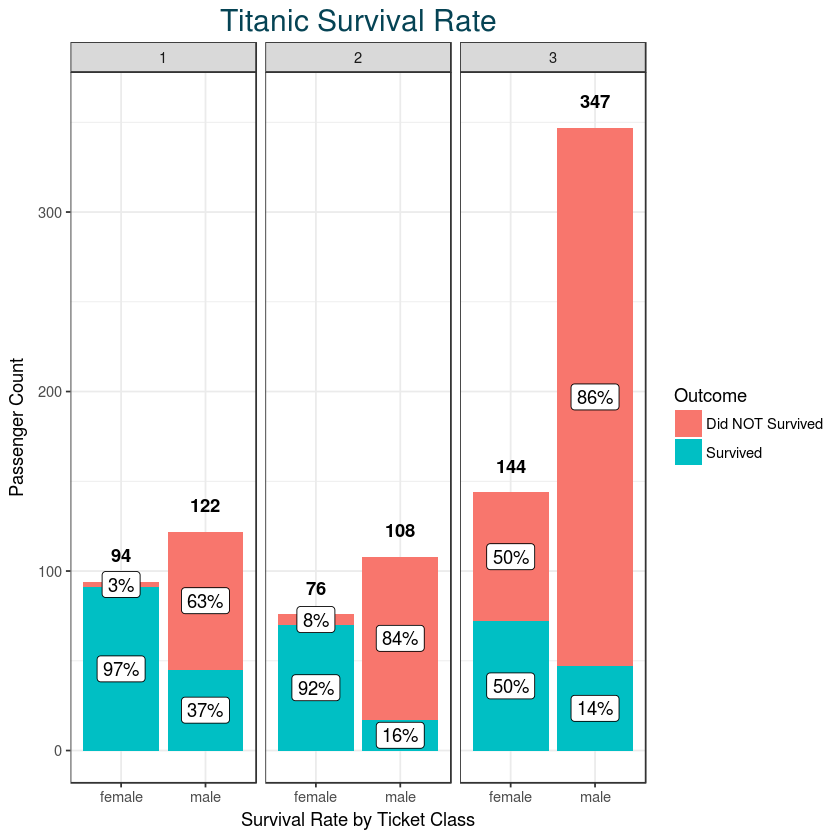

In [28]:
# Using facet_wrap(~ Pclass)
titanic %>%
  ggplot() +
  geom_bar(aes(x = Sex, fill = Survived)) +
  facet_wrap(~ Pclass) +
  geom_text(data = pclass_gender_ratio, aes(x = Sex, y = Count, label = Count), position = position_dodge(width=0.9), vjust= -1.5, fontface = "bold") +
  geom_label(data = pclass_gender_survived_ratio, aes(x = Sex, y = Count, label = paste0(Percentage, "%"), group = Survived), position = position_stack(vjust = 0.5)) +
  theme_bw() +
  theme(plot.title = element_text(hjust = 0.5, size=18, colour = "#054354")) +
  ggtitle("Titanic Survival Rate") +
  scale_x_discrete(name= "Survival Rate by Ticket Class") +
  scale_y_continuous(name = "Passenger Count", limits = c(0,360)) +
  scale_fill_discrete(name = "Outcome", labels = c("Did NOT Survived", "Survived"))  

#### Looking at Gender Proportion in each Class and Survival

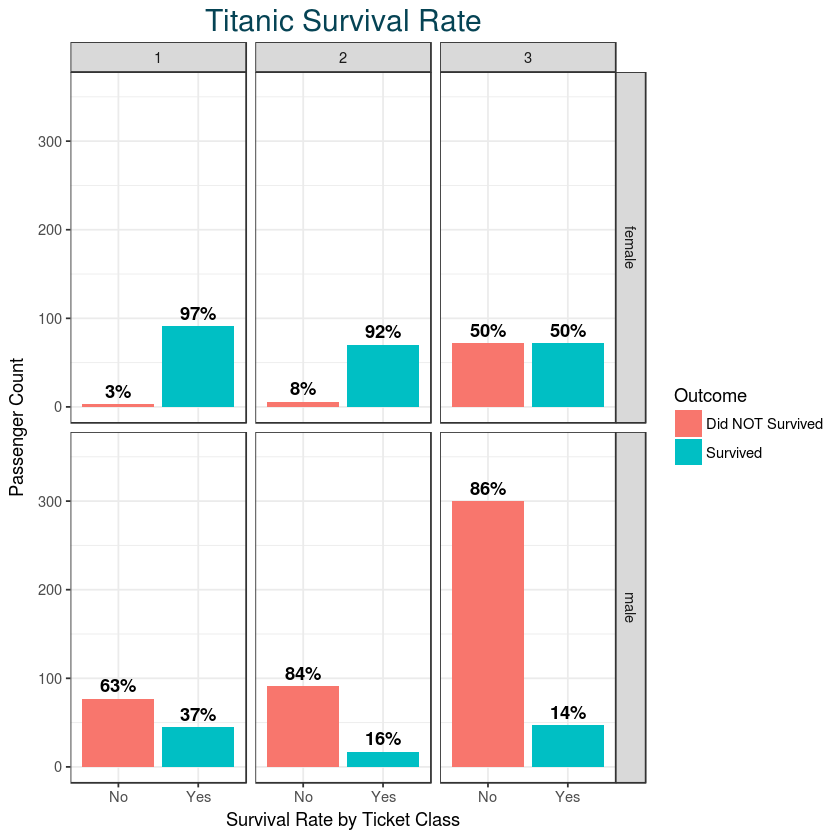

In [29]:
# Using facet_grid(Sex ~ Pclass) to separate Gender and Survival
titanic %>%
  ggplot() +
  geom_bar(aes(x = Survived, fill = Survived)) +
  facet_grid(Sex ~ Pclass) +
  geom_text(data = pclass_gender_survived_ratio, aes(x = Survived, y = Count, label = paste0(Percentage, "%")), position = position_dodge(width=0.9), vjust= -0.5, fontface = "bold") +
  theme_bw() +
  theme(plot.title = element_text(hjust = 0.5, size=18, colour = "#054354")) +
  ggtitle("Titanic Survival Rate") +
  scale_x_discrete(name= "Survival Rate by Ticket Class", labels = c("No", "Yes")) +
  scale_y_continuous(name = "Passenger Count", limits = c(0,360)) +
  scale_fill_discrete(name = "Outcome", labels = c("Did NOT Survived", "Survived"))  

<hr>

## Look at Age Distribution
- Looking at Age distribution using a Histogram (Continious Data)
  - Can add Vertical Lines (geom_vline) for every 5 year break up to 90
  - geom_vline(xintercept = 5*0:20, color = "blue", alpha = 0.2)
- Average Age of Passengers is around 29

In [30]:
# Remove Missing Values (177 NA Values)
mean(titanic$Age, na.rm = TRUE)

[1] 29.69912

Warning message:
“Removed 177 rows containing non-finite values (stat_bin).”

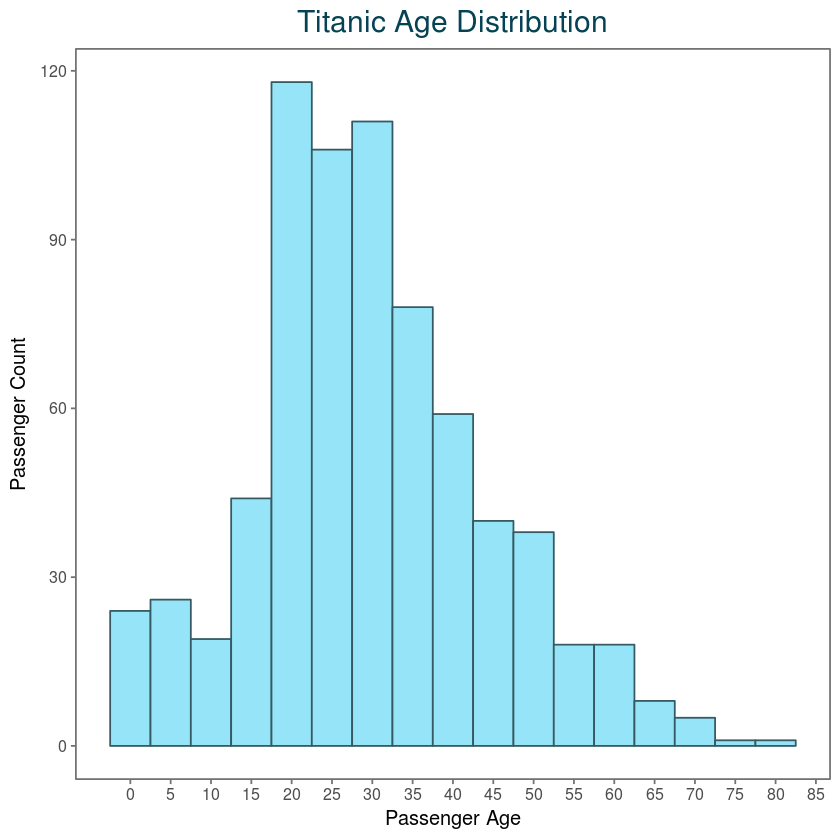

In [31]:
titanic %>%
  ggplot() +
  geom_histogram(aes(x = Age), binwidth = 5, color = "#355a63", fill = "#96e4f7") +
  theme_few() +
  theme(plot.title = element_text(hjust = 0.5, size=18, colour = "#054354")) +
  ggtitle("Titanic Age Distribution") +
  scale_x_continuous(name= "Passenger Age", breaks = 5*c(0:18)) +
  scale_y_continuous(name = "Passenger Count")

## Look at Survival Rate by Age
- Provide color for border, and use automatic fill based on Survived
- Majority of children (up to 10 years old) Survived
- People around the average age Did NOT Survive

Warning message:
“Removed 177 rows containing non-finite values (stat_bin).”

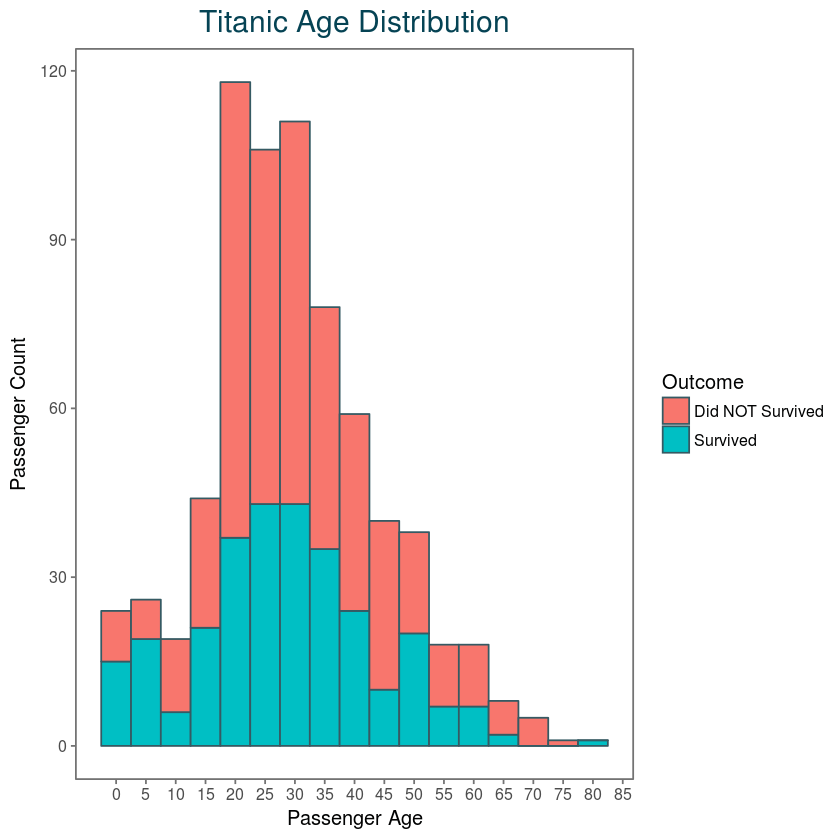

In [32]:
titanic %>%
  ggplot() +
  geom_histogram(aes(x = Age, fill = Survived), binwidth = 5, color = "#355a63") +
  theme_few() +
  theme(plot.title = element_text(hjust = 0.5, size=18, colour = "#054354")) +
  ggtitle("Titanic Age Distribution") +
  scale_x_continuous(name= "Passenger Age", breaks = 5*c(0:18)) +
  scale_y_continuous(name = "Passenger Count") +
  scale_fill_discrete(name = "Outcome", labels = c("Did NOT Survived", "Survived"))  

<hr>

## Look ar Survival Rates by Age when segmented by Gender and Class
- 1st Class:
  - Females:
    - Most Females in 1st Class Survived: 97% from previous data
  - Males:
    - Most Males up to Age 15 Survived
- 2nd Class:
  - Females:
    - 92% of Females Survived (from previous data)
    - Females up to Age 25 Survived
  - Males:
    - Males up to Age of 10 Survived
    - Majority of Males Age 15 and above Did NOT Survive
    - Almost all Males Age 45 and above Did NOT Survive
- 3rd Class:
  - Females;
    - 50% of Females Survived (based on previous data)
    - Can't tell much more looking at Age
  - Males:
    - 86% Did Not Survive (based on previous data)
    - Most Males 35 and above Did NOT Survive

#### First look at Survival Rate based on Gender and Class

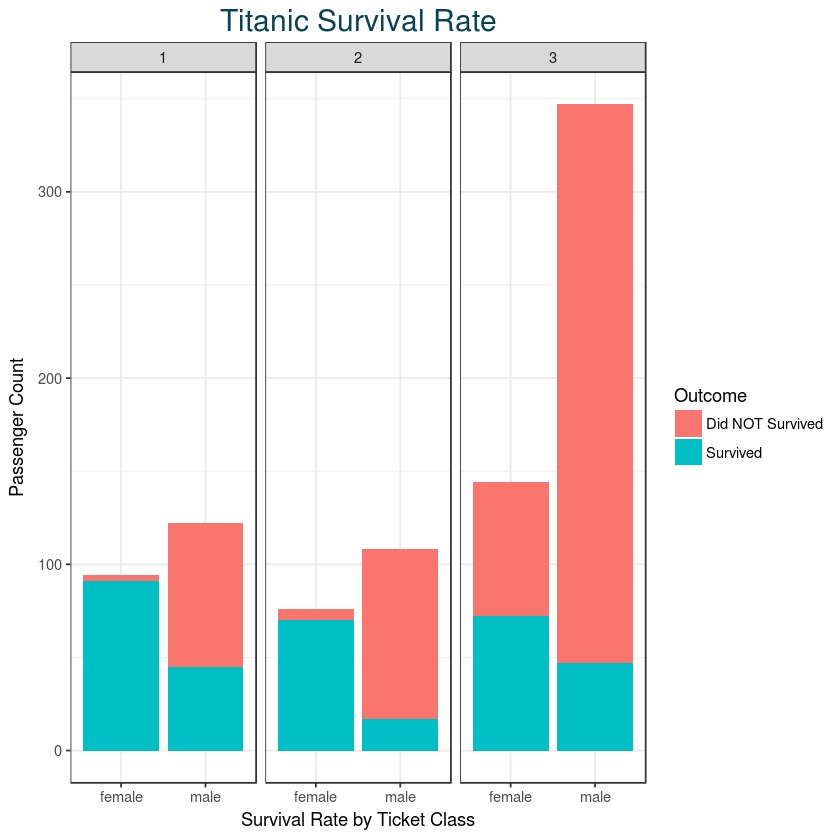

In [33]:
titanic %>%
  ggplot() +
  geom_bar(aes(x = Sex, fill = Survived)) +
  facet_wrap(~ Pclass) +
  theme_bw() +
  theme(plot.title = element_text(hjust = 0.5, size=18, colour = "#054354")) +
  ggtitle("Titanic Survival Rate") +
  scale_x_discrete(name= "Survival Rate by Ticket Class") +
  scale_y_continuous(name = "Passenger Count") +
  scale_fill_discrete(name = "Outcome", labels = c("Did NOT Survived", "Survived"))  

### Look At Survival Rate based on Gender and Class Segmented by Age
- Females that Did NOT Survive in 1st and 2nd Class (3% and 8%) seem to be randomly distributed by Age

Warning message:
“Removed 177 rows containing non-finite values (stat_bin).”

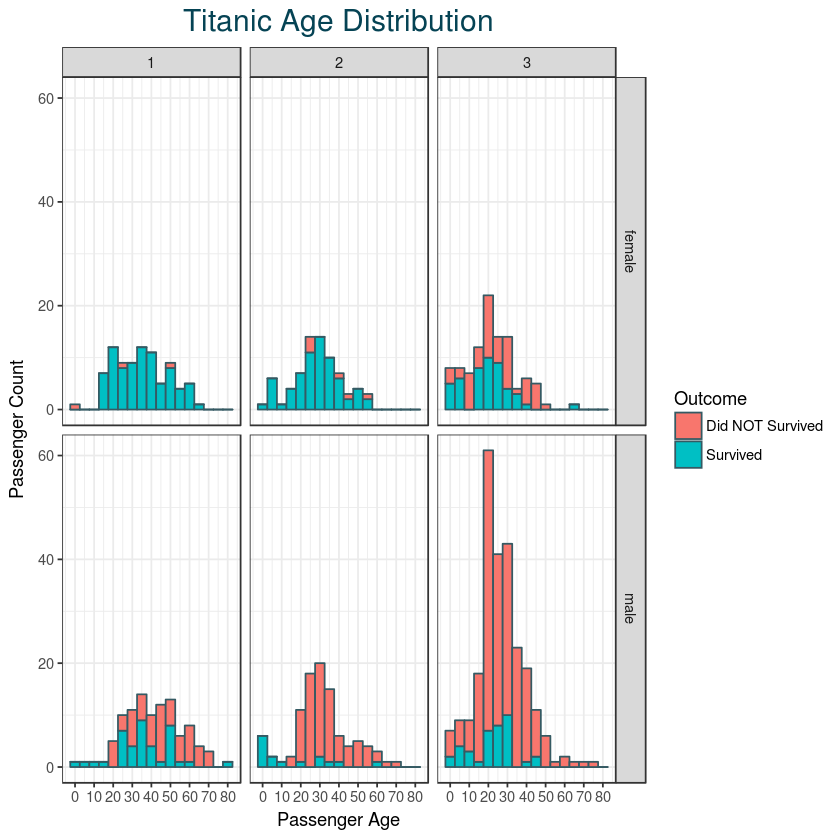

In [35]:
titanic %>%
  ggplot() +
  geom_histogram(aes(x = Age, fill = Survived), binwidth = 5, color = "#355a63") +
  facet_grid(Sex ~ Pclass) +
  theme_bw() +
  theme(plot.title = element_text(hjust = 0.5, size=18, colour = "#054354")) +
  ggtitle("Titanic Age Distribution") +
  scale_x_continuous(name= "Passenger Age", breaks = 10*c(0:8)) +
  scale_y_continuous(name = "Passenger Count") +
  scale_fill_discrete(name = "Outcome", labels = c("Did NOT Survived", "Survived"))  

<hr>

## Look at Survival based on Family Size
- Majority of Males amd Females in 3rd Pclass with Family Size of 5 and above  Did NOT Survive

In [36]:
titanic %>%
  group_by(FamilySize, Survived) %>%
  summarise(Count = n()) %>%
  mutate(Percentage = round(Count/sum(Count)*100))

FamilySize,Survived,Count,Percentage
1,0,374,70
1,1,163,30
2,0,72,45
2,1,89,55
3,0,43,42
3,1,59,58
4,0,8,28
4,1,21,72
5,0,12,80
5,1,3,20


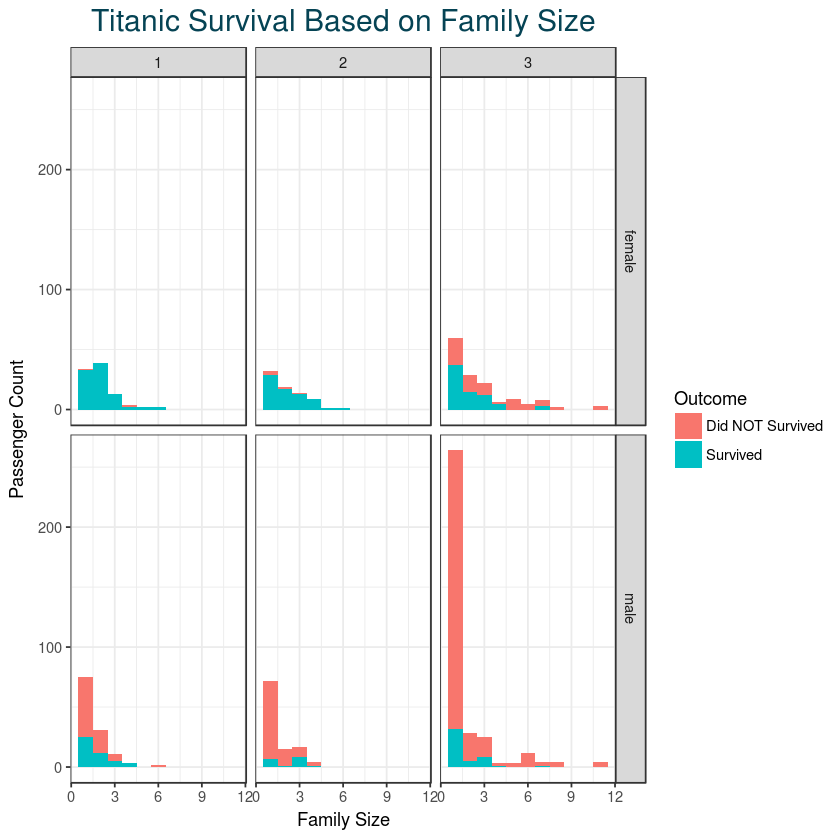

In [37]:
titanic %>%
  ggplot() +
  geom_histogram(aes(x = FamilySize, fill = Survived), binwidth = 1) +
  facet_grid(Sex ~ Pclass) +
  theme_bw() +
  theme(plot.title = element_text(hjust = 0.5, size=18, colour = "#054354")) +
  ggtitle("Titanic Survival Based on Family Size") +
  scale_x_continuous(name = "Family Size") +
  scale_y_continuous(name = "Passenger Count") +
  scale_fill_discrete(name = "Outcome", labels = c("Did NOT Survived", "Survived"))  

<hr>

## Looking At Survival by Gender, Pclass, Age and FamilySize

Warning message:
“Removed 177 rows containing non-finite values (stat_bin).”

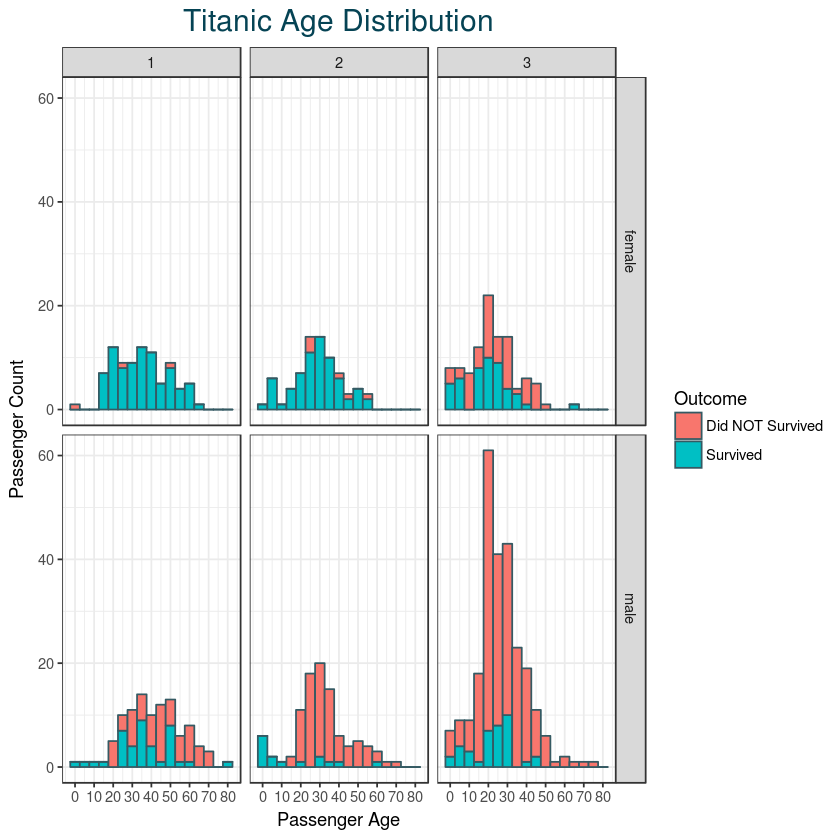

In [39]:
# Looking at Histogram of Survival by Age based on Sex and Pclass 
titanic %>%
  ggplot() +
  geom_histogram(aes(x = Age, fill = Survived), binwidth = 5, color = "#355a63") +
  facet_grid(Sex ~ Pclass) +
  theme_bw() +
  theme(plot.title = element_text(hjust = 0.5, size=18, colour = "#054354")) +
  ggtitle("Titanic Age Distribution") +
  scale_x_continuous(name= "Passenger Age", breaks = 10*c(0:8)) +
  scale_y_continuous(name = "Passenger Count") +
  scale_fill_discrete(name = "Outcome", labels = c("Did NOT Survived", "Survived"))  

- Younger Passengers from Smaller Families in Class 3 Survived 
- Passengers from Bigger Families in Class 3 Did NOT Survived

Warning message:
“Removed 177 rows containing missing values (geom_point).”

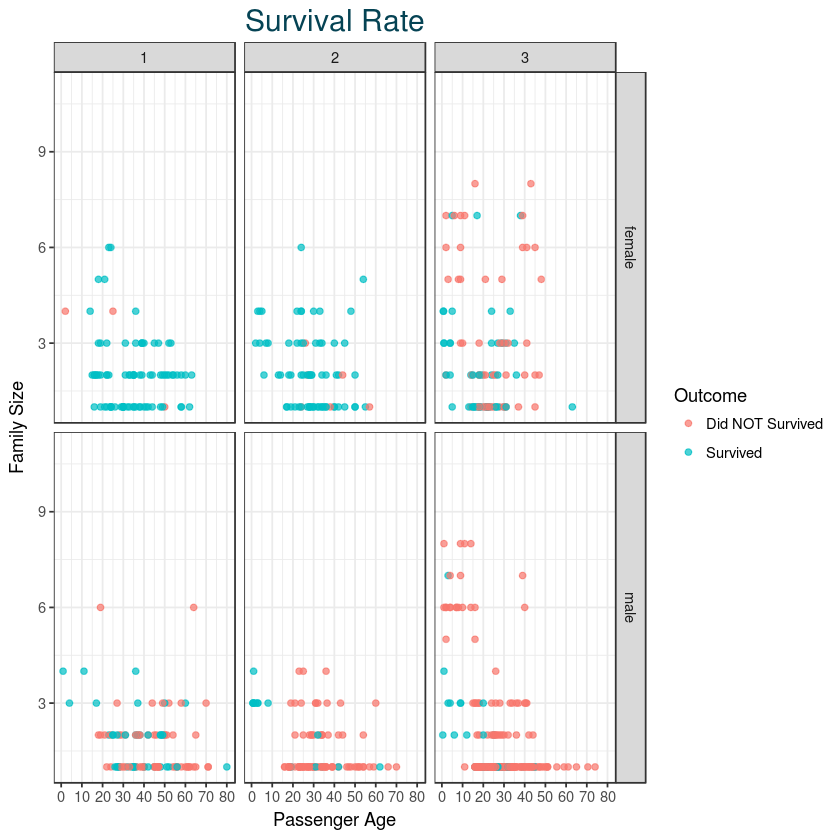

In [41]:
titanic %>%
  ggplot() +
  geom_point(aes(x = Age, y = FamilySize, color = Survived), alpha = 0.7) +
  facet_grid(Sex ~ Pclass) +
  theme_bw() +
  theme(plot.title = element_text(hjust = 0.5, size=18, colour = "#054354")) +
  ggtitle("Survival Rate") +
  scale_x_continuous(name= "Passenger Age", breaks = 10*c(0:8)) +
  scale_y_continuous(name = "Family Size") +
  scale_color_discrete(name = "Outcome", labels = c("Did NOT Survived", "Survived"))  

<hr>